# Redução de Dimensionalidade (PCA)

In [1]:
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

In [2]:
train_identity = pd.read_csv('../data/train_identity.csv')

In [3]:
merged_chunks = []
transaction_chunks = pd.read_csv('../data/train_transaction.csv', chunksize=10 ** 5)

for chunk in transaction_chunks:
    new_chunk = chunk.merge(train_identity, on='TransactionID', how='left')
    merged_chunks.append(new_chunk)

train = pd.concat(merged_chunks)
train.shape

(590540, 434)

In [4]:
sample_train = train.groupby('isFraud', group_keys=False)[train.columns].apply(lambda x: x.sample(frac=0.5))
sample_train.shape

(295270, 434)

In [5]:
X_train = sample_train.loc[:, sample_train.columns.str.startswith('V')]

print(f'Número de features escolhidas: {X_train.shape}')

Número de features escolhidas: (295270, 339)


In [6]:
del train, sample_train, train_identity, transaction_chunks

gc.collect()

11

In [7]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [8]:
X_train_transformed = numeric_transformer.fit_transform(X_train)

Text(0, 0.5, 'explained_variance_ratio')

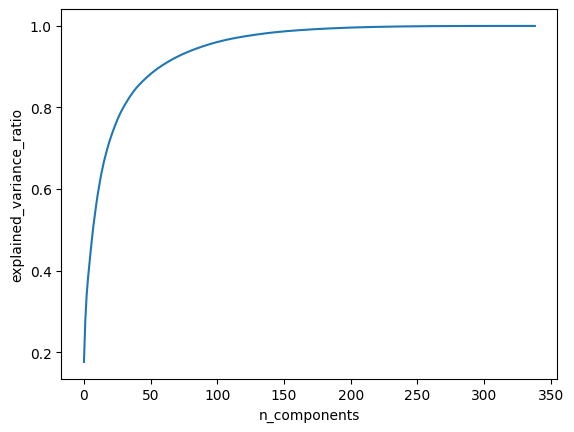

In [9]:
pca = PCA()
pca.fit(X_train_transformed)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("n_components")
plt.ylabel("explained_variance_ratio")

In [10]:
target_ratio = 0.95
d = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= target_ratio) + 1

print(d)

91
